In [118]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Transformata Fouriera

## Liczby zespolone i układ polarny

Narysuj wykres funkcji $A=\varphi$ (odpowiedniekiem funkcji $y=x$) dla $\varphi$ zdefiniowangeo od 0 do 10. Użyj do tego funkcje konwertujące współrzędne polarne na kartezjańskie (dostępne w wykładzie):

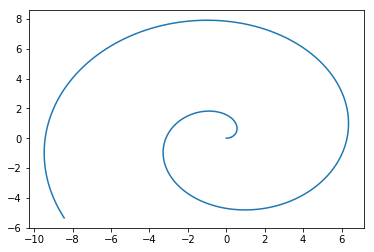

In [78]:
fi = arange(0, 10, 0.01)
A = fi

R = A * cos(fi)
I = A * sin(fi)

plot(R, I)

Teraz zrób to samo dla funkcji $A=1$:

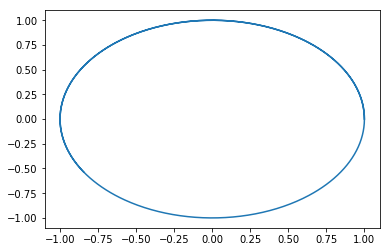

In [79]:
A = 1

R = A * cos(fi)
I = A * sin(fi)

plot(R, I)

Zrób wykres funkcji $A=sin(n\cdot\varphi)+k$ dla $\varphi$ od $-5\pi$ do $5\pi$ i pobaw się parametrami $n$ i $k$:

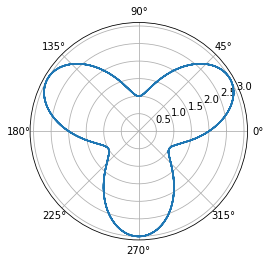

In [135]:
fi = arange(-5*pi, 5*pi, 0.01)

n = 3
k = 2
A = sin(n * fi) + k

# R = A * cos(fi)
# I = A * sin(fi)

# plot(R, I)
ax = axes(polar = True)
ax.plot(fi, A)

Zauważ, że to samo możesz osiągnąć korzystając z polarnego układu współrzędnych dopstępnego w matplotlib. Zrób zwykłą funkcję $y=x$ dla $x\in<0,10>$ i użyj następnego kodu żeby ją narysować:

    ax=axes(polar=True)
    ax.plot(x,y)

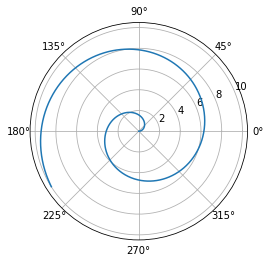

In [81]:
x = arange(0, 10, 0.01)
y = x

ax = axes(polar = True)
ax.plot(x, y)

## Sygnał zespolony - $e^{it}$

Ze wzoru Eulera wynika ciekawy związek:

\begin{equation}
e^{ix} = \cos{x} + i \cdot \sin{x}
\end{equation}

Dla ciekawych, proponuję obejrzeć ten film demonstrujący intucyjnie działanie powyższego twierdzenia: https://www.youtube.com/watch?v=F_0yfvm0UoU

Narysuj poniżej wykres wzoru $e^{it}$ dla zmiennej $t\in<0,2\pi>$. Do reprezentowania liczby urojonej $i$ stosuj w Python'ie nazwy *1j*. Zauważ, że wartość funkcji jest liczbą zespoloną, więc wykres domyślnie będzie rysował tylko jej część rzeczywistą. Narysuj zamiast tego wykres części rzeczywistej i urojonej (różnymi kolorami), a potem wykres amplitudy (wartości bezwzględnej) i fazy (kąta). Narysuj również amplitudę i fazę na wykresie polarnym.

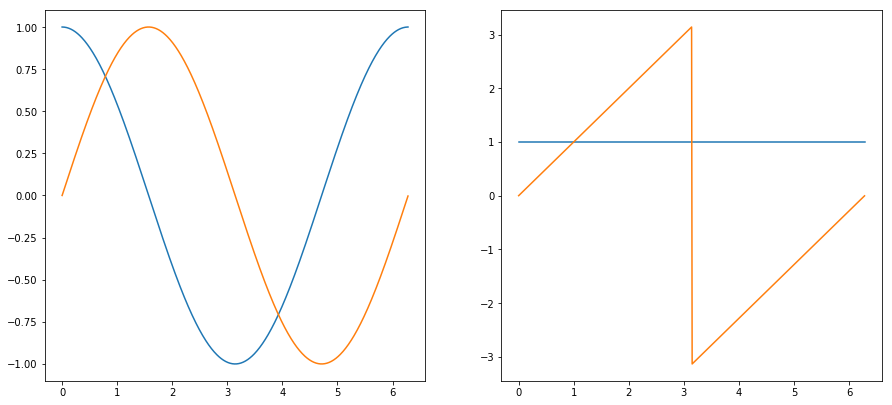

In [141]:
t = arange(0, 2*pi, 0.01)
f = math.e ** (1j*t)

figure(figsize=(15, 15))
subplot(2, 2, 1)
plot(t, f.real)
plot(t, f.imag)

subplot(2, 2, 2)
plot(t, abs(f))
plot(t, angle(f))

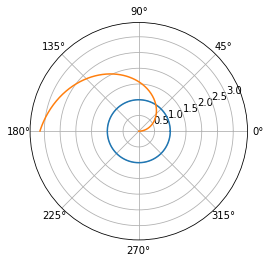

In [142]:
axes(polar = True).plot(t, abs(f))
axes(polar = True).plot(t, angle(f))

## Dyskretna Transformata Fouriera - DFT

Dyskretna transformata Fouriera jest przedstawiona wzorem:
\begin{equation}
X_k=\sum_{n=0}^{N-1} x_n \cdot e ^ {-i2\pi k n/N},\, k \in \mathbb{Z}
\end{equation}


Odwrotna transformata jest podana wzorem:

\begin{equation}
x_n=\frac{1}{N} \sum_{k=0}^{N-1} X_k \cdot e ^ {i2\pi k n/N},\, N \in \mathbb{Z}
\end{equation}

Wygeneruj prosty sygnał (np. $f=200, T=3, Fs=10000, \phi=\pi, A=2$) i policz jego transformatę Fouriera powyższym wzorem, a póżniej używając funkcji *np.fft.fft* (porównaj prędkość). Narysuj widmo amplitudowe i fazowe tego sygnału.

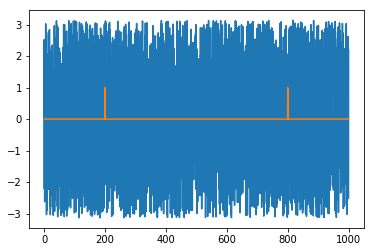

In [289]:
Fs = 1000
fi = pi
A = 2
T = 3
fr = 200

t = arange(0, T, 1/Fs)
f = A*sin(2*pi*fr*t + fi)

N = f.size
F = fft.fft(f)

f = linspace(0, Fs, N)
"""
Dlaczego bierzemy zakres wartości do Fs?
Bo to są częstotliwości mniejsze niż częstotliwość próbkowania, więc będą zarejestrowane?
"""

plot(f, angle(F)) # widmo fazowe
plot(f, abs(F)/N) # widmo amplitudowe 

Zrób sygnał, który jest sumą trzech sygnałów sinusoidalnych i narysuj jego widmo.

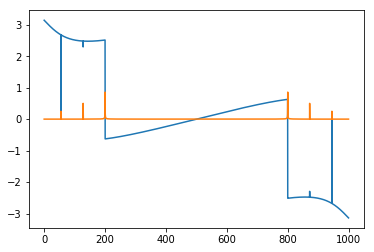

In [297]:
Fs = 1000
T = 3

t = arange(0, T, 1/Fs)

y1 = 2*sin(2*pi*200.1*t + pi)
y2 = -1*sin(2*pi*128*t + 0.23*pi)
y3 = 0.5*sin(2*pi*55*t + 0.5*pi)

y = y1+y2+y3

N = y.size
F = fft.fft(y)

f = linspace(0, Fs, N)
plot(f, angle(F))
plot(f, abs(F)/N)

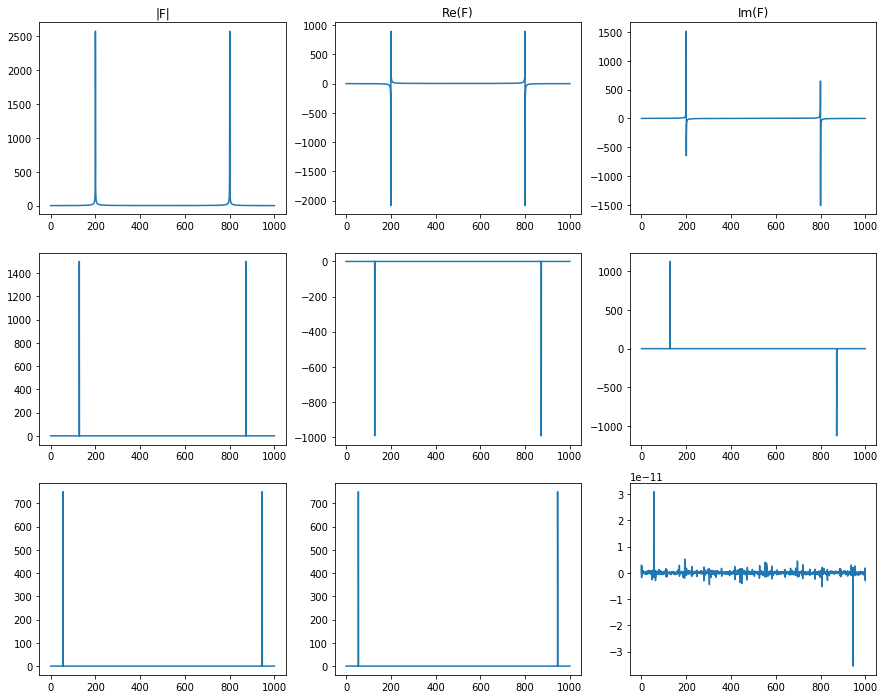

In [298]:
Fs = 1000
N = y1.size
F = fft.fft(y1)

f = linspace(0, Fs, N)
figure(figsize=(15, 12))
subplot(3, 3, 1)
title("|F|")
plot(f, abs(F))

subplot(3, 3, 2)
title("Re(F)")
plot(f, F.real)

subplot(3, 3, 3)
title("Im(F)")
plot(f, F.imag)

F = fft.fft(y2)

subplot(3, 3, 4)
plot(f, abs(F))

subplot(3, 3, 5)
plot(f, F.real)

subplot(3, 3, 6)
plot(f, F.imag)

F = fft.fft(y3)

subplot(3, 3, 7)
plot(f, abs(F))

subplot(3, 3, 8)
plot(f, F.real)

subplot(3, 3, 9)
plot(f, F.imag)

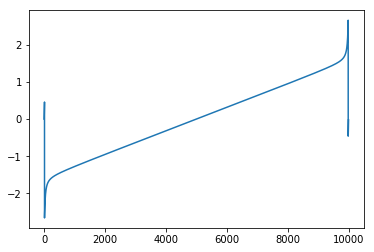

In [287]:
Fs = 10000
A = 1
fr = 11.325
T = 2
fi = 0

t = arange(0, T, 1/Fs)
y = A*sin(2*pi*fr*t + fi)

Y = fft.fft(y)
N = y.size

f = linspace(0, Fs, N)
plot(f, angle(Y))

# Praca domowa

## Zadanie 1

Wczytaj jakiś złożony/naturalny sygnał z pliku i narysuj jego widmo. Opisz krótko co widzisz?

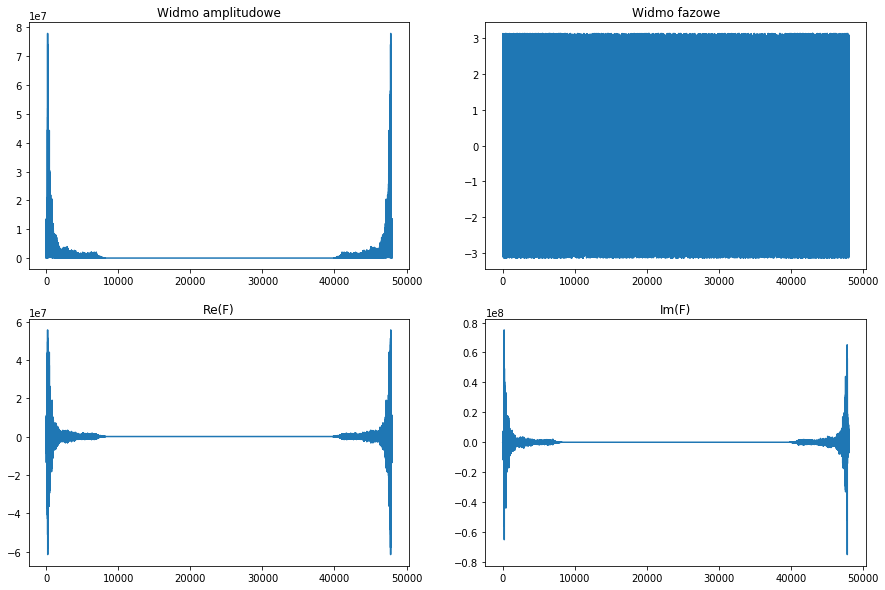

In [211]:
from scipy.io.wavfile import read
from ipywidgets import HTML
from IPython.display import display
from IPython.display import Audio

fs, y = read("zdanie.wav")

display(Audio(y, rate=fs))

N = y.size
F = fft.fft(y)

f = linspace(0, fs, N)

figure(figsize=(15,10))
subplot(2, 2, 1)
title("Widmo amplitudowe")
plot(f, abs(F))

subplot(2, 2, 2)
title("Widmo fazowe")
plot(f, angle(F))

subplot(2, 2, 3)
title("Re(F)")
plot(f, F.real)

subplot(2, 2, 4)
title("Im(F)")
plot(f, F.imag)

### Opis
Pasmo częstotliwości: < 10 kHz

Części rzeczywista i urojona niezerowe; występują składowe o fazach $\phi \neq k\frac{\pi}{2}$

Składowe o najniższych częstotliwościach mają największe amplitudy

## Zadanie 2 - resynteza

Użyj wartości powyższego widma we wzorze sygnału sinusowego, żeby odtworzyć oryginalny sygnał w dziedzinie czasu:

\begin{equation}
y_t = \frac{2}{N}\sum_{k=0}^{N/2} |Y_k| \cdot sin(2 \pi \omega_k n + \angle Y_k )
\end{equation}

gdzie 

  - $N$ to długość analizowanego sygnału
  - $Y_k$ to wartość transfromaty Fouriera w punkcie $k$ 
  - $\omega_k=\frac{k}{N}$
  - $n$ to liczby w zakresie $<0..N-1>$

In [372]:
def defourierize(Y, N):
    y = zeros(N)
    for n in range(0, N):
        for k in range(0, (N//2)):
            # nie wiem dlaczego odtworzony sygnał jest przesunięty w fazie o pi/2
            # możliwe że z powodu tego, że któryś indeks jest przesunięty? ale to nie powinno powodować opóźnienia o pi/2
            y[n] += abs(Y[k]) * sin(2*pi*(k/N)*n + angle(Y[k]) + pi/2) 
        y[n] *= 2/N
    return y

def defourierize2(Y, N):
    y = zeros(N)
    for n in range(0, N):
        for k in range(0, (N//2)):
            # haha no tak, to dlatego, że sin(x + pi/2) = cos(x)
            y[n] += abs(Y[k]) * cos(2*pi*(k/N)*n + angle(Y[k])) 
        y[n] *= 2/N
    return y

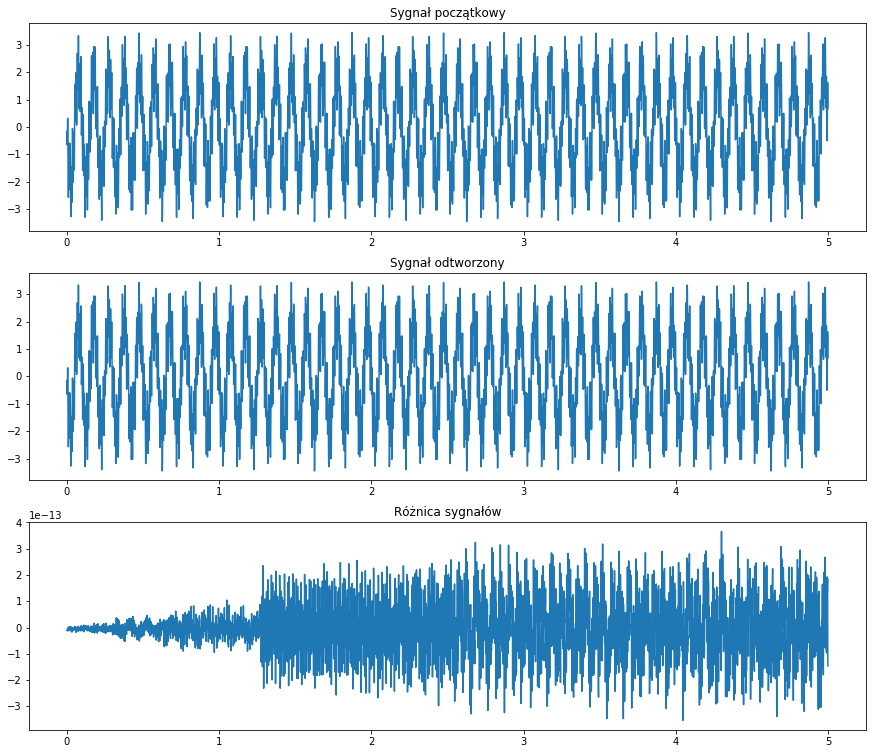

In [373]:
# na początek próby z prostym sygnałem z 3 składowymi
    
Fs = 1000
T = 5
t = arange(0, T, 1/Fs)
y1 = 2*sin(2*pi*10*t + pi)
y2 = -1*sin(2*pi*128*t + 0.23*pi)
y3 = 0.5*sin(2*pi*55*t + 0.5*pi)
y = y1 + y2 + y3

N = y.size
Y = fft.fft(y)

yd = defourierize2(Y, N)

figure(figsize=(15, 13))
subplot(3, 1, 1)
title("Sygnał początkowy")
plot(t, y)

subplot(3, 1, 2)
title("Sygnał odtworzony")
plot(t, yd)

subplot(3, 1, 3)
title("Różnica sygnałów")
plot(t, y-yd)

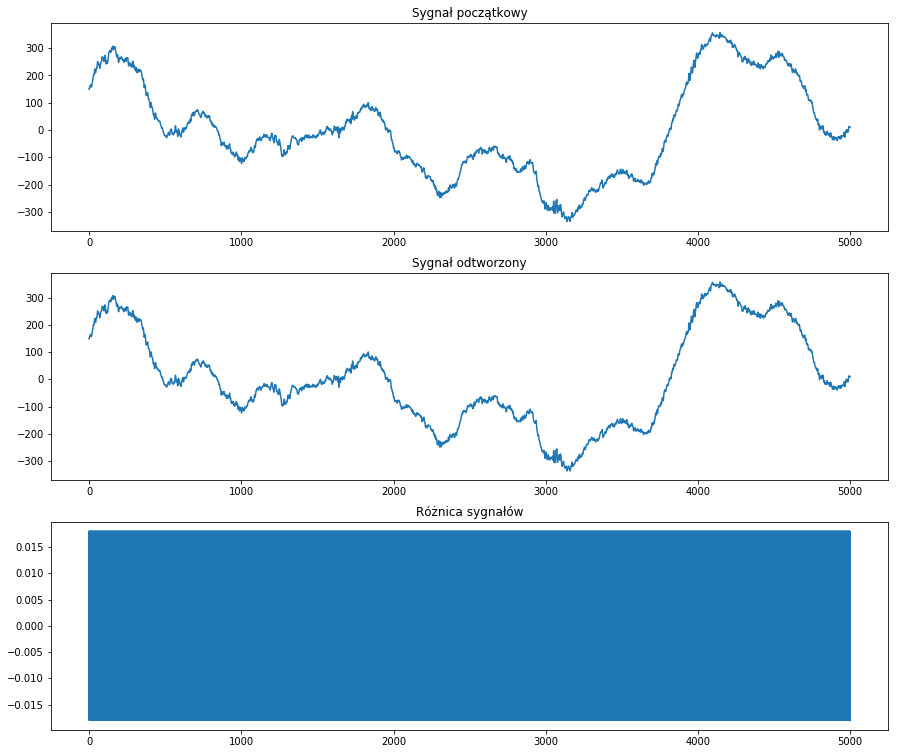

In [374]:
fs, y = read("zdanie.wav")

y = y[:5000]
N = y.size

# odejmujemy od sygnału jego wartość średnią żeby wartości odzyskanego sygnały były te same
ay = average(y)
yfloat = zeros(N)
for i in range(0, N):
    yfloat[i] = float(float(y[i]) - ay)

Y = fft.fft(yfloat)

yd = defourierize2(Y, N)

t = arange(0, N, 1)

figure(figsize=(15, 13))
subplot(3, 1, 1)
title("Sygnał początkowy")
plot(t, yfloat)

subplot(3, 1, 2)
title("Sygnał odtworzony")
plot(t, yd)

subplot(3, 1, 3)
title("Różnica sygnałów")
plot(t, yfloat-yd)